In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import fates_xarray_funcs
from fates_xarray_funcs import monthly_to_annual

In [3]:
cases_in = {'S0':'f19_0007_trendyS0_39e91e09b5_c2da27fd',
         'S1':'f19_0008_trendyS1_39e91e09b5_c2da27fd',
         'S2':'f19_0010_trendyS2_hybrid_39e91e09b5_c2da27fd',
         'S3':'f19_0009_trendyS3_parta_39e91e09b5_c2da27fd',
         'S3b':'f19_0011_trendyS3_partb_hybrid_39e91e09b5_c2da27fd'}

cases_out = ['S0','S1','S2','S3']

start_year = {'S0':1701,
         'S1':1701,
         'S2':1901,
         'S3':1701,
         'S3b':1901}

base_data_dir = '/global/homes/c/cdkoven/cdkoven_m2467/trendy_2025_tseries_files/'

In [4]:
class datadict(dict):
    def getdata(self, varname, cases_in=cases_in, cases_out=cases_out, start_year=start_year, base_data_dir=base_data_dir):
        fins = {}
        dataarrays_out = {}
        for case_in in cases_in:
            fins[case_in] = xr.open_dataset(base_data_dir+cases_in[case_in]+'/'+cases_in[case_in]+'.tseries.'+varname+'.nc')
        for case_out in cases_out:
            if case_out in ['S0','S1'] or 'time' not in fins[case_out][varname].dims:
                dataset_out = fins[case_out]
            elif case_out == 'S2':
                s2a = fins['S1'].isel(time=slice(0,200*12))
                s2b = fins['S2']
                dataset_out = xr.concat((s2a,s2b), dim='time')
            elif case_out == 'S3':
                s3a = fins['S3'].isel(time=slice(0,200*12))
                s3b = fins['S3b']
                dataset_out = xr.concat((s3a,s3b), dim='time')
            dataset_out['time'] = np.arange(len(dataset_out['time']))/12.+1701.
            dataarrays_out.update({case_out:dataset_out[varname]})
        self.update({varname:dataarrays_out})

    def fates_frac_scale(self, varname):
        dataarrays_out = {}
        if varname[0:6] == 'FATES_':
            newvarname = varname[6:]
        else:
            raise Exception
        for case in self[varname]:
            scaledvar = (self[varname][case] * self['FATES_FRACTION'][case].data).rename(newvarname)
            dataarrays_out[case] = scaledvar
        self.update({newvarname:dataarrays_out})

    def writedata(self, varname, output_data_dir=base_data_dir+'/postprocessed/'):
        for case_out in self[varname]:
            self[varname][case_out].to_netcdf(output_data_dir+case_out+'/'+varname+'_'+case_out+'.nc')


In [5]:
varblock = datadict()

In [6]:
varblock.getdata('FATES_GPP')
varblock.getdata('NBP')
varblock.getdata('TSA')
varblock.getdata('area')
varblock.getdata('landfrac')
varblock.getdata('FATES_FRACTION')


In [7]:
varblock.fates_frac_scale('FATES_GPP')

In [8]:
varblock.writedata('GPP')

In [9]:
varblock['GPP']['S0']

<xarray.DataArray 'GPP' (time: 3888, lat: 96, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) float64 1.701e+03 1.701e+03 ... 2.025e+03 2.025e+03
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0

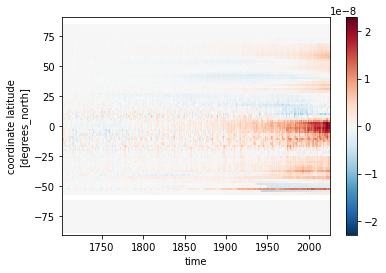

In [7]:
(monthly_to_annual(varblock['FATES_GPP']['S3'].mean(dim='lon'))- varblock['FATES_GPP']['S3'].mean(dim='lon').isel(time=slice(0,240)).mean(dim='time')).plot(x='time',y='lat')


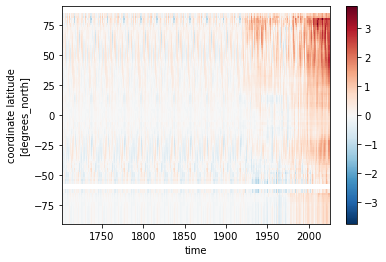

In [8]:
(monthly_to_annual(varblock['TSA']['S3'].mean(dim='lon'))- varblock['TSA']['S3'].mean(dim='lon').isel(time=slice(0,240)).mean(dim='time')).plot(x='time',y='lat')

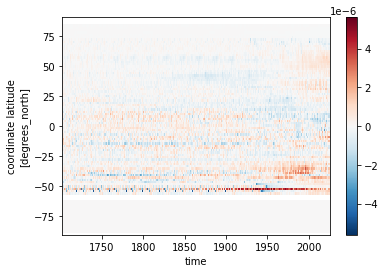

In [9]:
(monthly_to_annual(varblock['NBP']['S3'].mean(dim='lon'))- varblock['NBP']['S3'].mean(dim='lon').isel(time=slice(0,240)).mean(dim='time')).plot(x='time',y='lat')


In [10]:
len(varblock)

3

In [12]:
a = 'FATES_GPP'
a.lstrip('FATES_')

'GPP'

In [13]:
a = 'FATE_GPP'
a.lstrip('FATES_')

'GPP'